# TICKER TO CIK MAPPER

In [19]:
import os
os.listdir()

['.ipynb_checkpoints',
 'Members.xlsx',
 'Parsing Company 10Ks From the SEC.ipynb',
 'sec-edgar-filings',
 'tikcer_to_cik.ipynb',
 'Untitled.ipynb',
 '~$Members.xlsx',
 '새 폴더',
 '전처리.ipynb']

In [24]:
import pandas as pd

ticker_df = pd.read_excel('./Members.xlsx', sheet_name='Sheet3', header=None)

In [25]:
ticker_df

,0
0,AACG UQ
1,AACI UQ
2,AADI UR
3,AAL UW
4,AAME UQ
...,...
4015,SMTC UW
4016,SNBR UW
4017,SNCY UW
4018,SNDR UN


In [32]:
ticker_df[0] = ticker_df[0].apply(lambda x: x.split(' ')[0])

In [58]:
tickers = list(ticker_df[0])

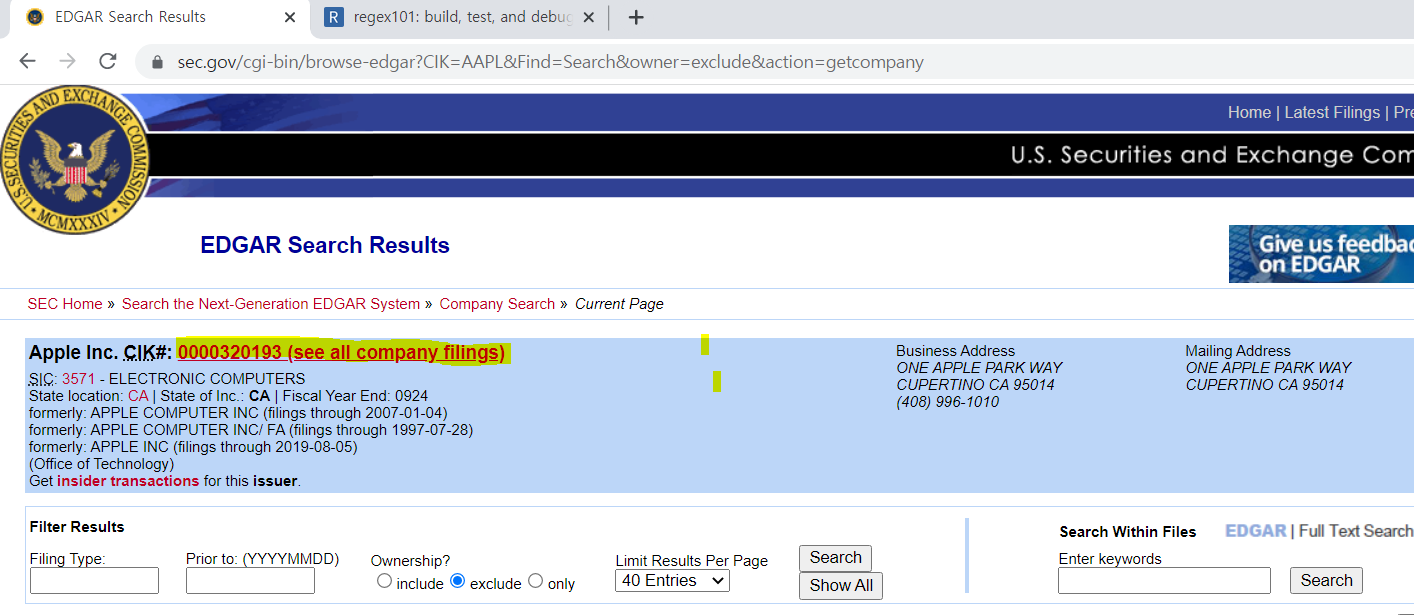

In [63]:
from bs4 import BeautifulSoup
import time
import re, requests
headers= {
    'user-agent' : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.82 Safari/537.36"
}

def ticker2cik(tickers):
    
    url = "http://www.sec.gov/cgi-bin/browse-edgar?CIK={}&Find=Search&owner=exclude&action=getcompany"
    ticker_cik_dict = {}
        
    for ticker in tickers:
        res = requests.get(url.format(ticker), headers=headers)
        soup = BeautifulSoup(res.content, "html.parser")
        try:
            result = soup.select_one("span.companyName > a").get_text()

            if result:

                # ex) '0000320193 (see all company filings)'
                cik = result.split(' ')[0]
                ticker_cik_dict[ticker] = cik
            else:
                print(f"CIK NUMBER UNKNOWN FOR THE TICKER: {ticker}")
                ticker_cik_dict[ticker] = None
                continue
        except AttributeError:
            print("ticker")
            continue
            
        time.sleep(0.1)
        
    return ticker_cik_dict                       

In [64]:
result = ticker2cik(tickers)

AttributeError: 'NoneType' object has no attribute 'get_text'

In [ ]:
csv_path = "./sec_cik_tic.csv"
df = pd.DataFrame(result)
df.to_csv("./ticker_cik")


```shell
curl -sL https://www.sec.gov/include/ticker.txt | sort > tickercik.txt
awk '$2=="yourcik"{print $1}' tickercik.txt
```

https://pypi.org/project/sec-cik-mapper/